# Frequency domain Filtering

When you import pylab as pylab, you can use functions and methods provided by both pyplot and numpy without explicitly importing them separately.

In [49]:
import cv2

from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
#from scipy.stats import signaltonoise
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit

### Frequency domain Gaussian blur filter with numpy fft

C:\Users\hpary\AppData\Local\Temp\ipykernel_6880\140856190.py:7: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gauss_kernel = np.outer(signal.gaussian(im.shape[0], 5), signal.gaussian(im.shape[1], 5))
C:\Users\hpary\AppData\Local\Temp\ipykernel_6880\140856190.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot(2,3,4), pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int))
C:\Users\hpary\AppData\Local\Temp\ipykernel_6880\140856190.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  fp.fftshift(freq_kernel))).astype(int))
C:\Users\hpary\AppData\Local\Temp\ipykernel_6880\140856190.py:36: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(c

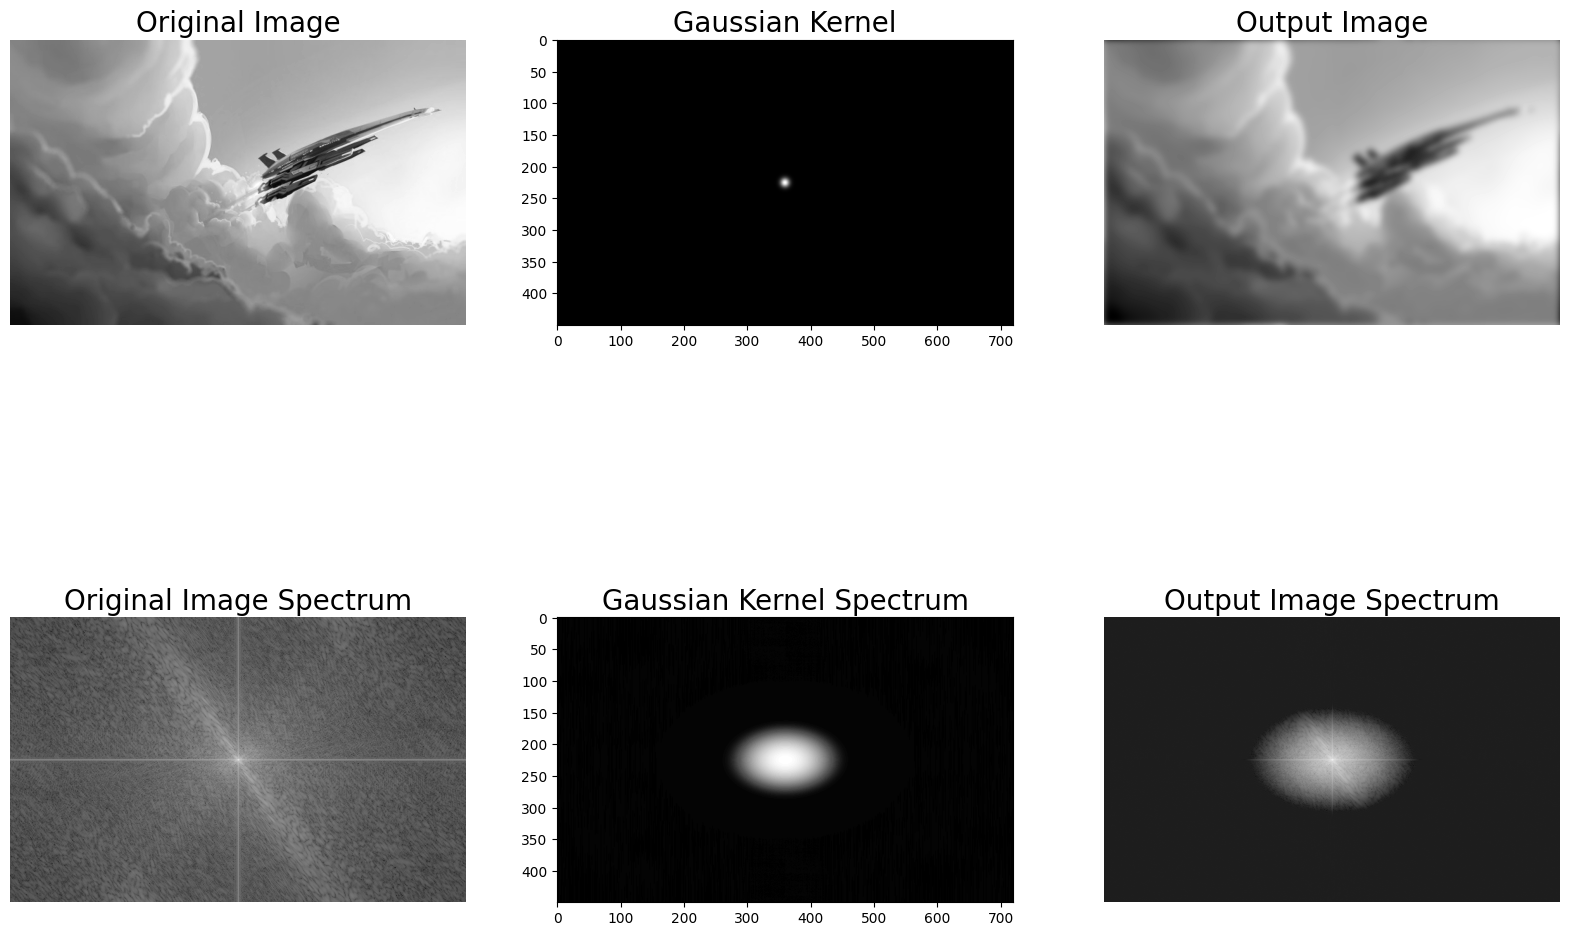

In [50]:
pylab.figure(figsize=(20,15))
pylab.gray() # show the filtered result in grayscale
im = np.mean(imread('images\sr2.jpg'), axis=2)



gauss_kernel = np.outer(signal.gaussian(im.shape[0], 5), signal.gaussian(im.shape[1], 5))


freq = fp.fft2(im)


assert(freq.shape == gauss_kernel.shape)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))



convolved = freq*freq_kernel # by the convolution theorem, simply multiply in the frequency domain



im1 = fp.ifft2(convolved).real



pylab.subplot(2,3,1), pylab.imshow(im), pylab.title('Original Image',
size=20), pylab.axis('off')
pylab.subplot(2,3,2), pylab.imshow(gauss_kernel), pylab.title('Gaussian Kernel', size=20)
pylab.subplot(2,3,3), pylab.imshow(im1) # the imaginary part is an artifact
pylab.title('Output Image', size=20), pylab.axis('off')
pylab.subplot(2,3,4), pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int))
pylab.title('Original Image Spectrum', size=20), pylab.axis('off')
pylab.subplot(2,3,5), pylab.imshow( (20*np.log10( 0.1 +
fp.fftshift(freq_kernel))).astype(int))
pylab.title('Gaussian Kernel Spectrum', size=20), pylab.subplot(2,3,6)
pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(convolved))).astype(int))
pylab.title('Output Image Spectrum', size=20), pylab.axis('off')
pylab.subplots_adjust(wspace=0.2, hspace=0)
pylab.show()

### Gaussian kernel in the frequency domain

C:\Users\hpary\AppData\Local\Temp\ipykernel_6880\3287694081.py:4: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gauss_kernel = np.outer(signal.gaussian(im.shape[0], 1),
C:\Users\hpary\AppData\Local\Temp\ipykernel_6880\3287694081.py:5: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  signal.gaussian(im.shape[1], 1))


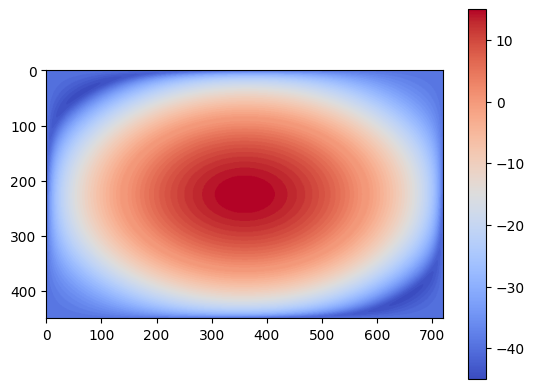

In [51]:
im = rgb2gray(imread('images\sr2.jpg'))


gauss_kernel = np.outer(signal.gaussian(im.shape[0], 1),
signal.gaussian(im.shape[1], 1))
freq = fp.fft2(im)
freq_kernel = fp.fft2(fp.ifftshift(gauss_kernel))
pylab.imshow( (20*np.log10( 0.01 +
fp.fftshift(freq_kernel))).real.astype(int), cmap='coolwarm') # 0.01 is added to keep the argument to log function always positive
pylab.colorbar()
pylab.show()

### Frequency domain Gaussian blur filter with scipy signal fftconvolve()

(224, 225)


C:\Users\hpary\AppData\Local\Temp\ipykernel_6880\3260253920.py:7: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) # 2D Gaussian kernel of size 11x11 with σ = 3
C:\Users\hpary\AppData\Local\Temp\ipykernel_6880\3260253920.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


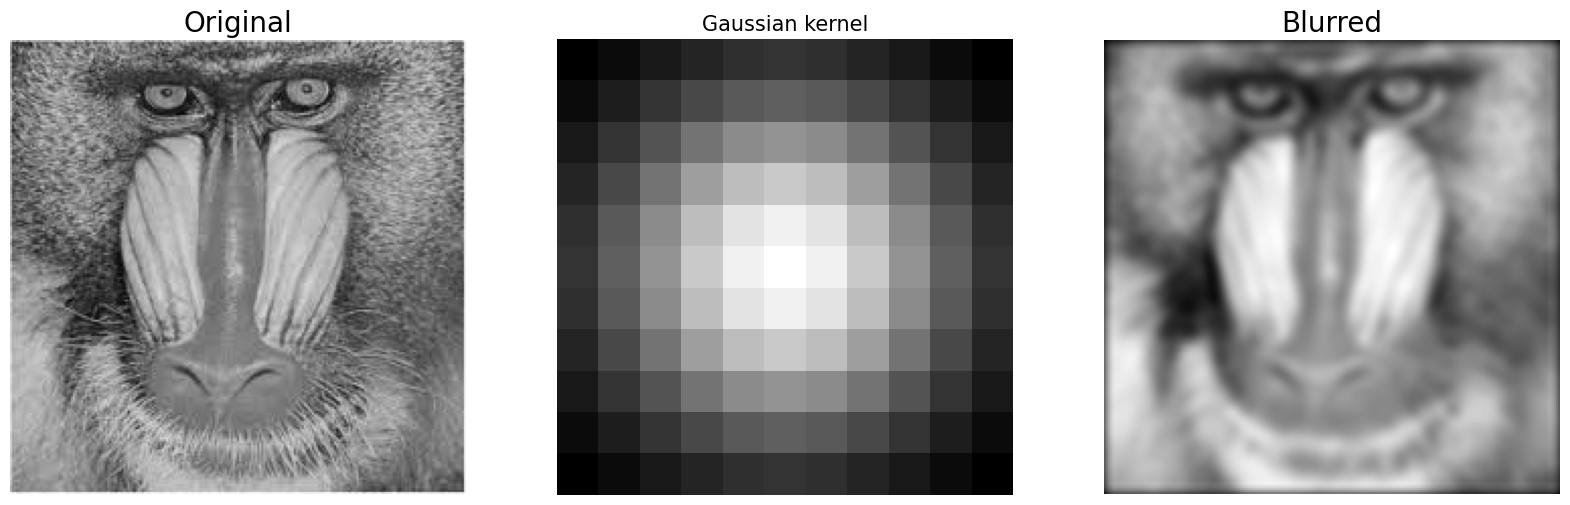

In [52]:

im = cv2.imread('images/mandrill.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

print(im.shape)
# (224, 225)
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) # 2D Gaussian kernel of size 11x11 with σ = 3
im_blurred = signal.fftconvolve(im, gauss_kernel, mode='same')


fig, (ax_original, ax_kernel, ax_blurred) = pylab.subplots(1, 3, figsize=(20,8))


ax_original.imshow(im, cmap='gray')
ax_original.set_title('Original', size=20)
ax_original.set_axis_off()
ax_kernel.imshow(gauss_kernel)
ax_kernel.set_title('Gaussian kernel', size=15)
ax_kernel.set_axis_off()
ax_blurred.imshow(im_blurred, cmap='gray')
ax_blurred.set_title('Blurred', size=20)
ax_blurred.set_axis_off()
fig.show()

C:\Users\hpary\AppData\Local\Temp\ipykernel_6880\3515630317.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot(1,2,1), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
C:\Users\hpary\AppData\Local\Temp\ipykernel_6880\3515630317.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot(1,2,2), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)


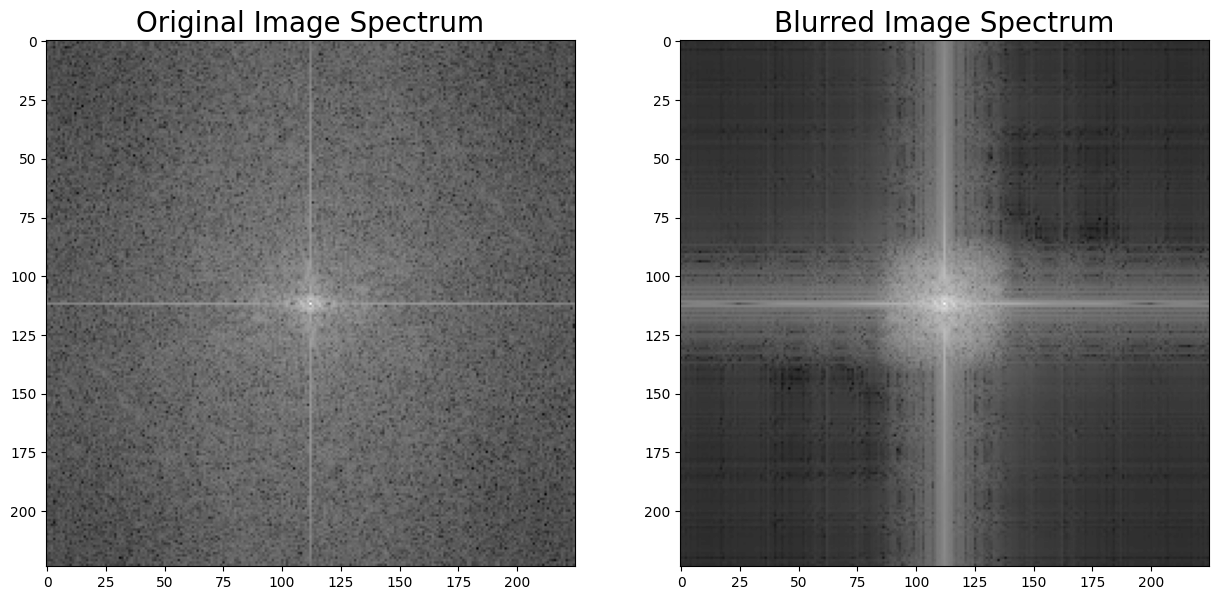

In [53]:
import scipy.fftpack as fftpack
F1 = fftpack.fft2((im).astype(float))
F2 = fftpack.fftshift( F1 )
pylab.figure(figsize=(15,8))
pylab.subplot(1,2,1), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
pylab.title('Original Image Spectrum', size=20)
F1 = fftpack.fft2((im_blurred).astype(float))
F2 = fftpack.fftshift( F1 )
pylab.subplot(1,2,2), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
pylab.title('Blurred Image Spectrum', size=20)
pylab.show()

### Comparing the runtimes of SciPy convolve() and fftconvolve() with the Gaussian blur kernel

(224, 225)


C:\Users\hpary\AppData\Local\Temp\ipykernel_6880\1700406077.py:7: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) # 2D Gaussian kernel of size 11x11 with σ = 3


(<Axes: title={'center': 'ffconvolve Output'}>,
 Text(0.5, 1.0, 'ffconvolve Output'),
 (-0.5, 224.5, 223.5, -0.5))

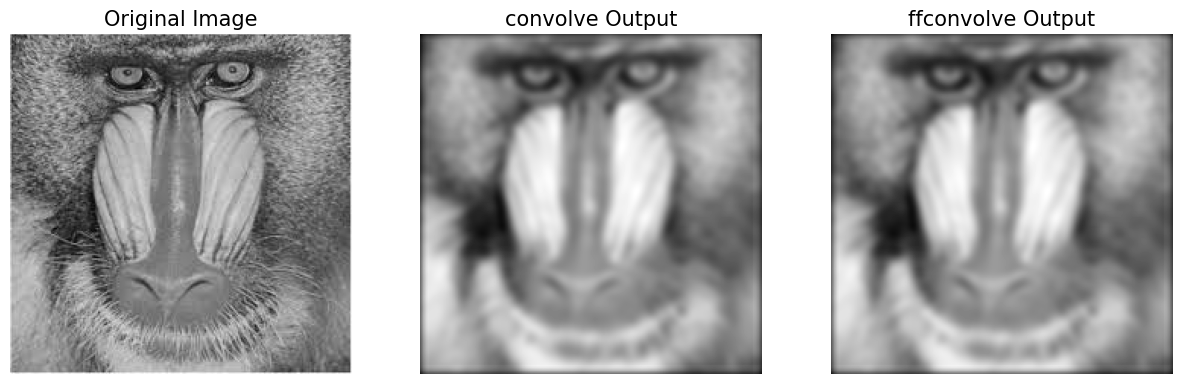

In [54]:

im = cv2.imread('images/mandrill.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

print(im.shape)
# (224, 225)
gauss_kernel = np.outer(signal.gaussian(11, 3), signal.gaussian(11, 3)) # 2D Gaussian kernel of size 11x11 with σ = 3
im_blurred1 = signal.convolve(im, gauss_kernel, mode="same")
im_blurred2 = signal.fftconvolve(im, gauss_kernel, mode='same')


def wrapper_convolve(func):
    def wrapped_convolve():
        return func(im, gauss_kernel, mode="same")
    return wrapped_convolve


wrapped_convolve = wrapper_convolve(signal.convolve)
wrapped_fftconvolve = wrapper_convolve(signal.fftconvolve)
times1 = timeit.repeat(wrapped_convolve, number=1, repeat=100)
times2 = timeit.repeat(wrapped_fftconvolve, number=1, repeat=100)


pylab.figure(figsize=(15,5))
pylab.gray()
pylab.subplot(131), pylab.imshow(im), pylab.title('Original Image',size=15), pylab.axis('off')
pylab.subplot(132), pylab.imshow(im_blurred1), pylab.title('convolve Output', size=15), pylab.axis('off')
pylab.subplot(133), pylab.imshow(im_blurred2), pylab.title('ffconvolve Output', size=15),pylab.axis('off')

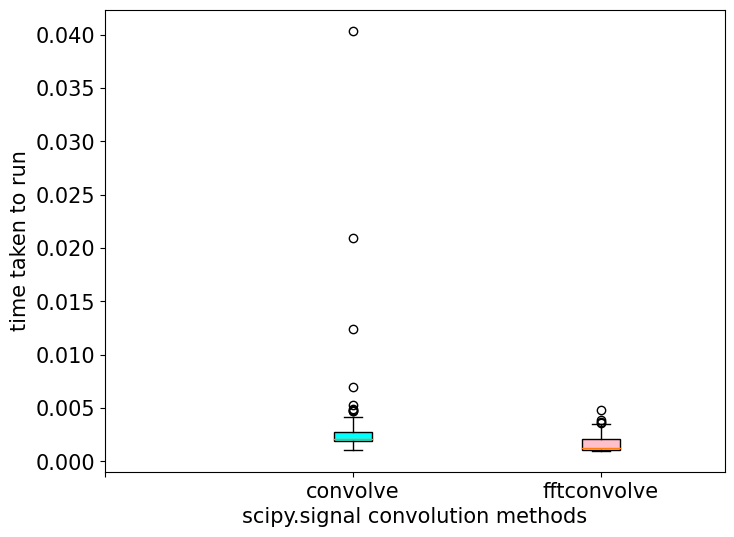

In [55]:
data = [times1, times2]
pylab.figure(figsize=(8,6))
box = pylab.boxplot(data, patch_artist=True) #notch=True,
colors = ['cyan', 'pink']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
pylab.xticks(np.arange(3), ('', 'convolve', 'fftconvolve'), size=15)
pylab.yticks(fontsize=15)
pylab.xlabel('scipy.signal convolution methods', size=15)
pylab.ylabel('time taken to run', size = 15)
pylab.show()

### High-Pass Filter (HPF)

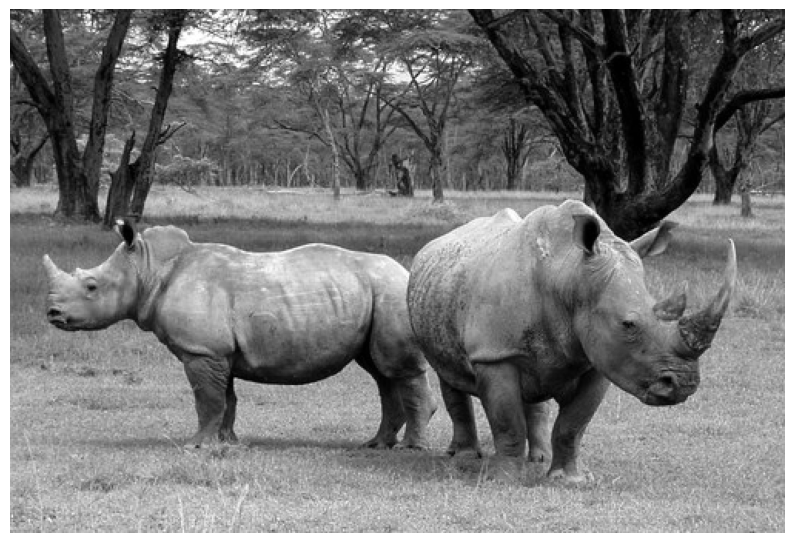

(<Figure size 1000x1000 with 1 Axes>,
 (-0.5, 502.5, 339.5, -0.5),
 None)

In [56]:
im = cv2.imread('images/rhino.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

pylab.figure(figsize=(10,10)), pylab.imshow(im, cmap=pylab.cm.gray), pylab.axis('off'), pylab.show()

C:\Users\hpary\AppData\Local\Temp\ipykernel_6880\575726222.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.figure(figsize=(10,10)), pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int)), pylab.show()


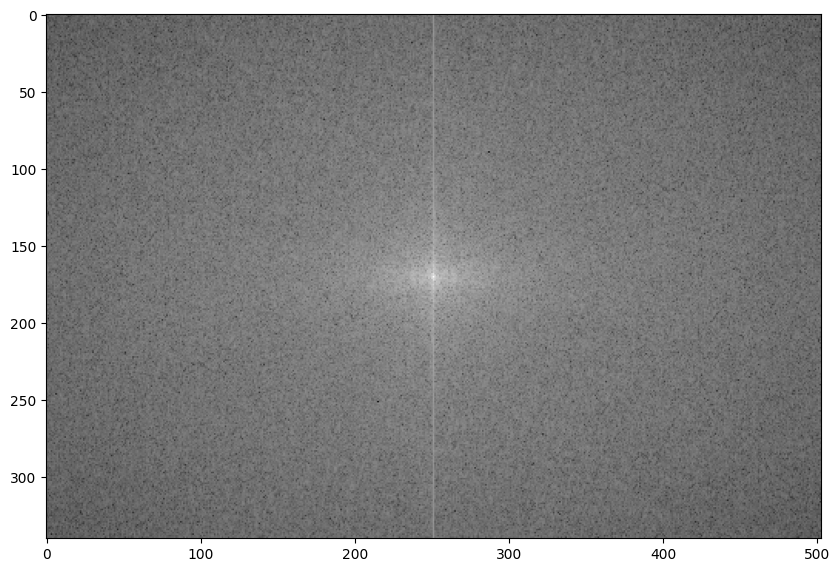

(<Figure size 1000x1000 with 1 Axes>,
 None)

In [57]:
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
freq1 = np.copy(freq)
freq2 = fp.fftshift(freq1)
pylab.figure(figsize=(10,10)), pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int)), pylab.show()

C:\Users\hpary\AppData\Local\Temp\ipykernel_6880\314825177.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))


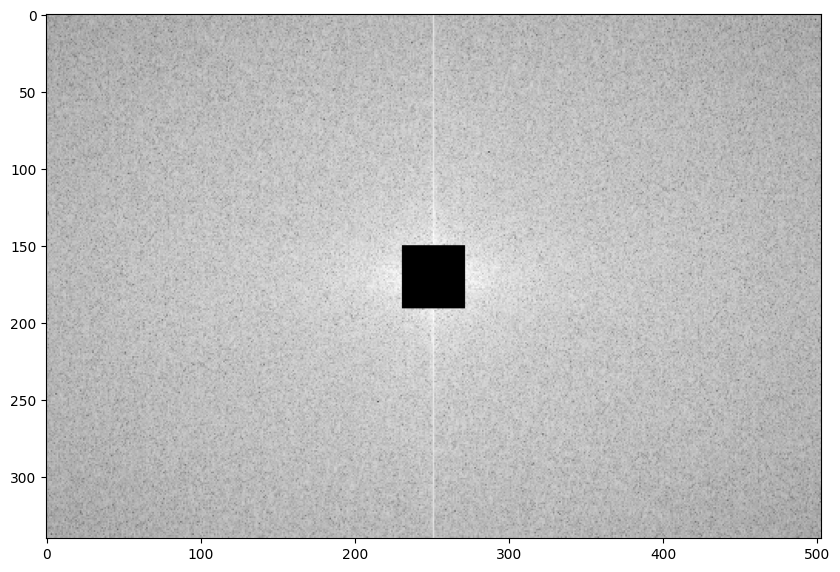

In [58]:
# apply HPF
freq2[half_w-20:half_w+21,half_h-20:half_h+21] = 0 # select all but the first 20x20 (low) frequencies
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))
pylab.show()

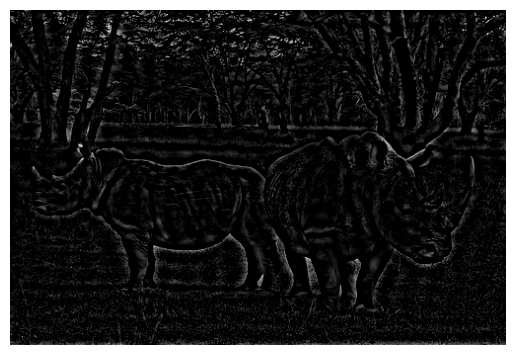

(<matplotlib.image.AxesImage at 0x15e70f76a50>,
 (-0.5, 502.5, 339.5, -0.5),
 None)

In [59]:
im1 = np.clip(fp.ifft2(fftpack.ifftshift(freq2)).real,0,255) # clip pixel values after IFFT
#print(signaltonoise(im1, axis=None))
# 0.5901647786775175
pylab.imshow(im1, cmap='gray'), pylab.axis('off'), pylab.show()

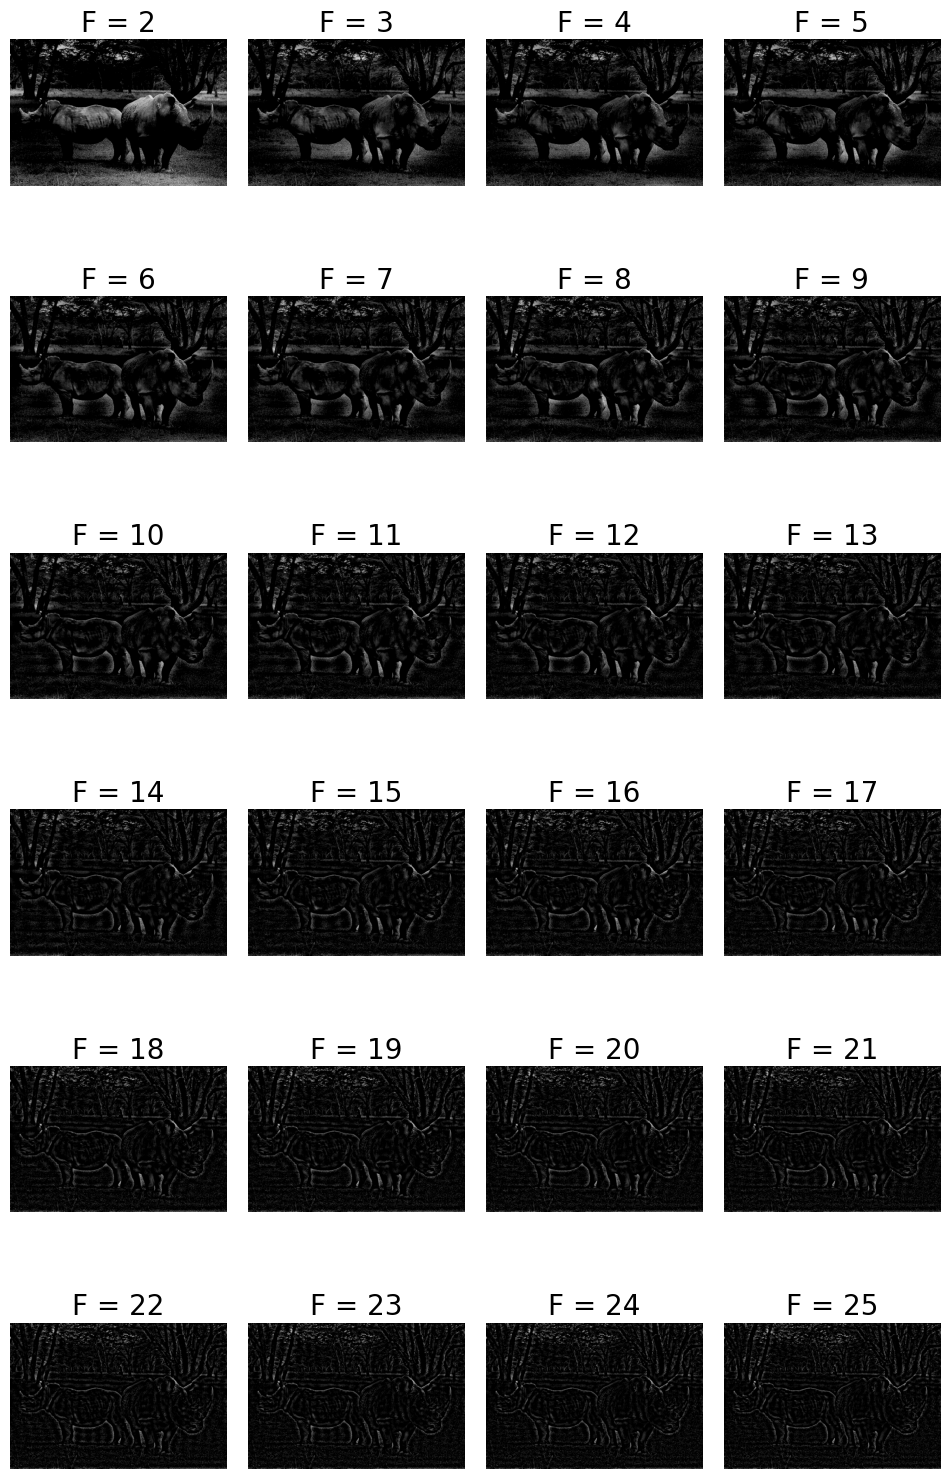

In [62]:
from scipy import fftpack



im = cv2.imread(r'images\rhino.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)



freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
snrs_hp = []
lbs = list(range(1,25))
pylab.figure(figsize=(12,20))
for l in lbs:
    freq1 = np.copy(freq)
    freq2 = fftpack.fftshift(freq1)
    freq2[half_w-l:half_w+l+1,half_h-l:half_h+l+1] = 0 # select all but the first lxl (low) frequencies
    im1 = np.clip(fp.ifft2(fftpack.ifftshift(freq2)).real,0,255) # clip pixel values after IFFT
    #snrs_hp.append(signaltonoise(im1, axis=None))
    pylab.subplot(6,4,l), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('F = ' + str(l+1), size=20)
pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()

### Low-pass filter (LPF)

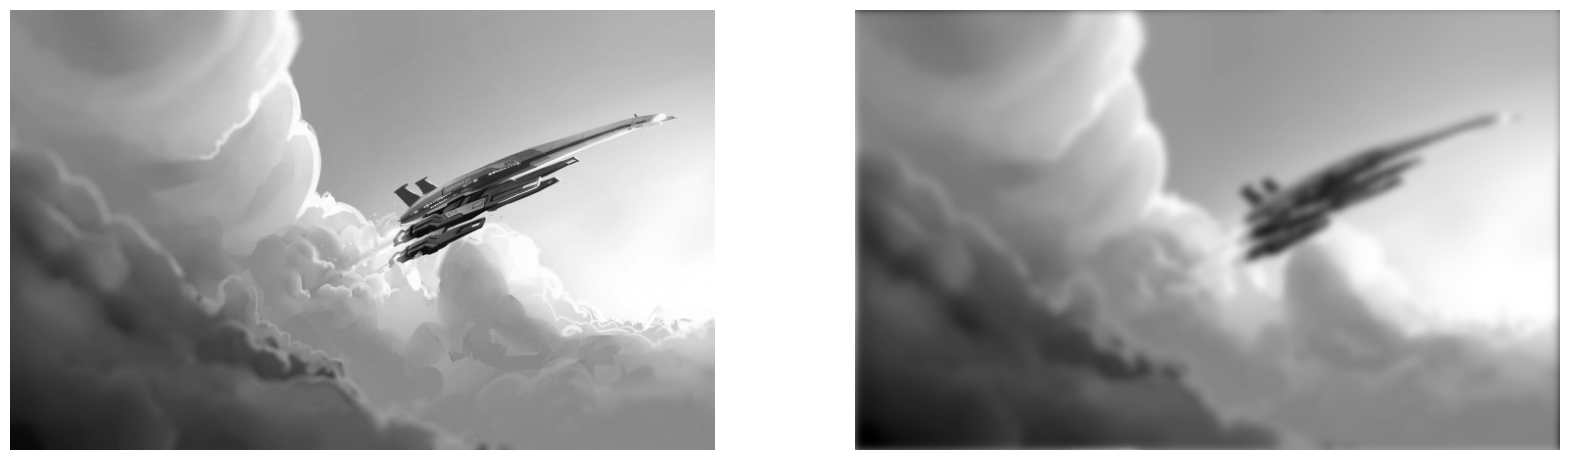

In [37]:
import numpy.fft as fp
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20,10))
pylab.gray() # show the result in grayscale

im = rgb2gray(imread('images/sr2.jpg'))


freq = fp.fft2(im)
freq_gaussian = ndimage.fourier_gaussian(freq, sigma=4)
im1 = fp.ifft2(freq_gaussian)
axes1.imshow(im), axes1.axis('off'), axes2.imshow(im1.real) # the imaginary part is an artifact
axes2.axis('off')
pylab.show()

C:\Users\hpary\AppData\Local\Temp\ipykernel_6880\706543968.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  numpy.fft.fftshift(freq_gaussian))).astype(int))


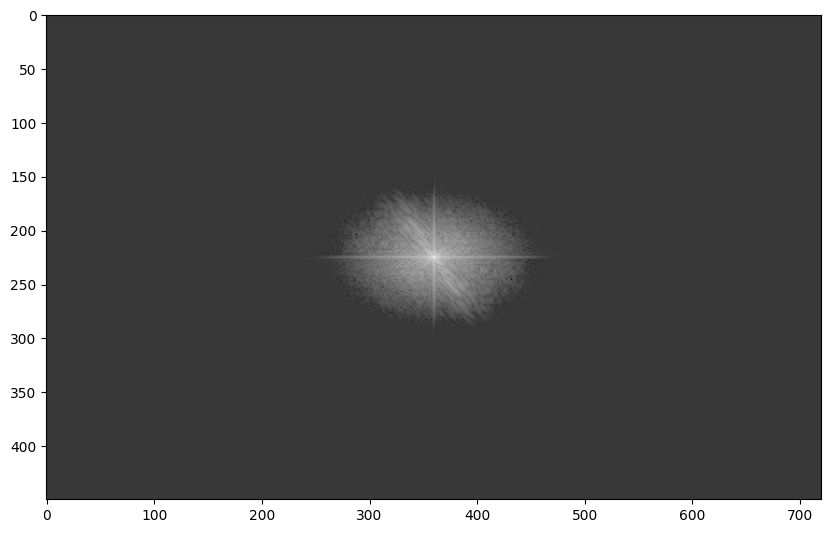

In [38]:
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 +
numpy.fft.fftshift(freq_gaussian))).astype(int))
pylab.show()

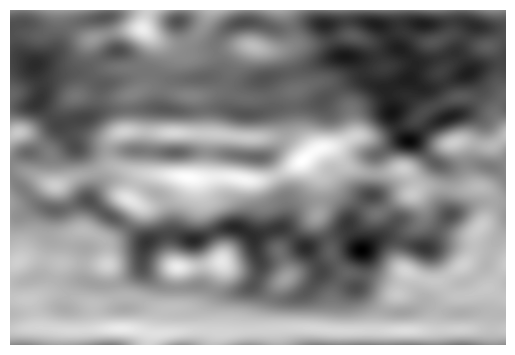

C:\Users\hpary\AppData\Local\Temp\ipykernel_6880\3953082813.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))


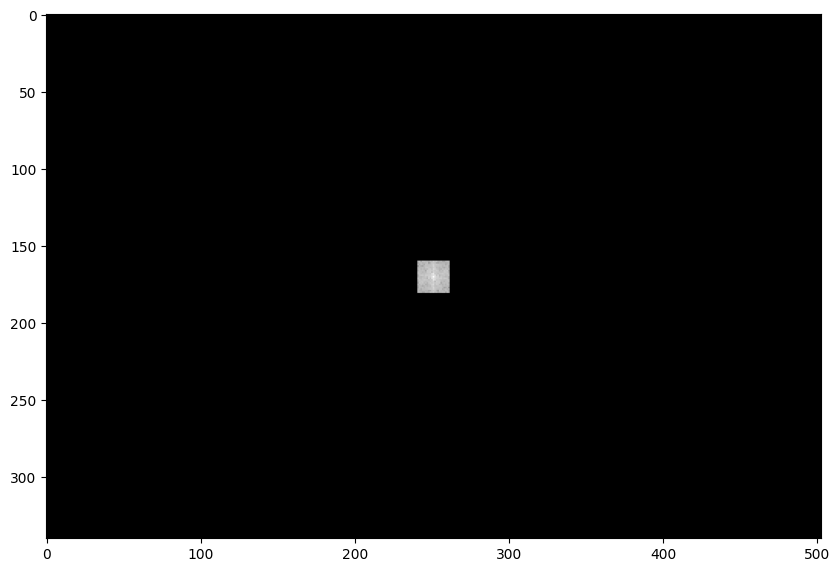

In [63]:
from scipy import fftpack
im = np.array(Image.open('images/rhino.jpg').convert('L'))

# low pass filter
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
freq1 = np.copy(freq)
freq2 = fftpack.fftshift(freq1)
freq2_low = np.copy(freq2)
freq2_low[half_w-10:half_w+11,half_h-10:half_h+11] = 0 # block the lowfrequencies
freq2 -= freq2_low # select only the first 20x20 (low) frequencies, block the high frequencies
im1 = fp.ifft2(fftpack.ifftshift(freq2)).real
#print(signaltonoise(im1, axis=None))
# 2.389151856495427
pylab.imshow(im1, cmap='gray'), pylab.axis('off')
pylab.show()
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))
pylab.show()

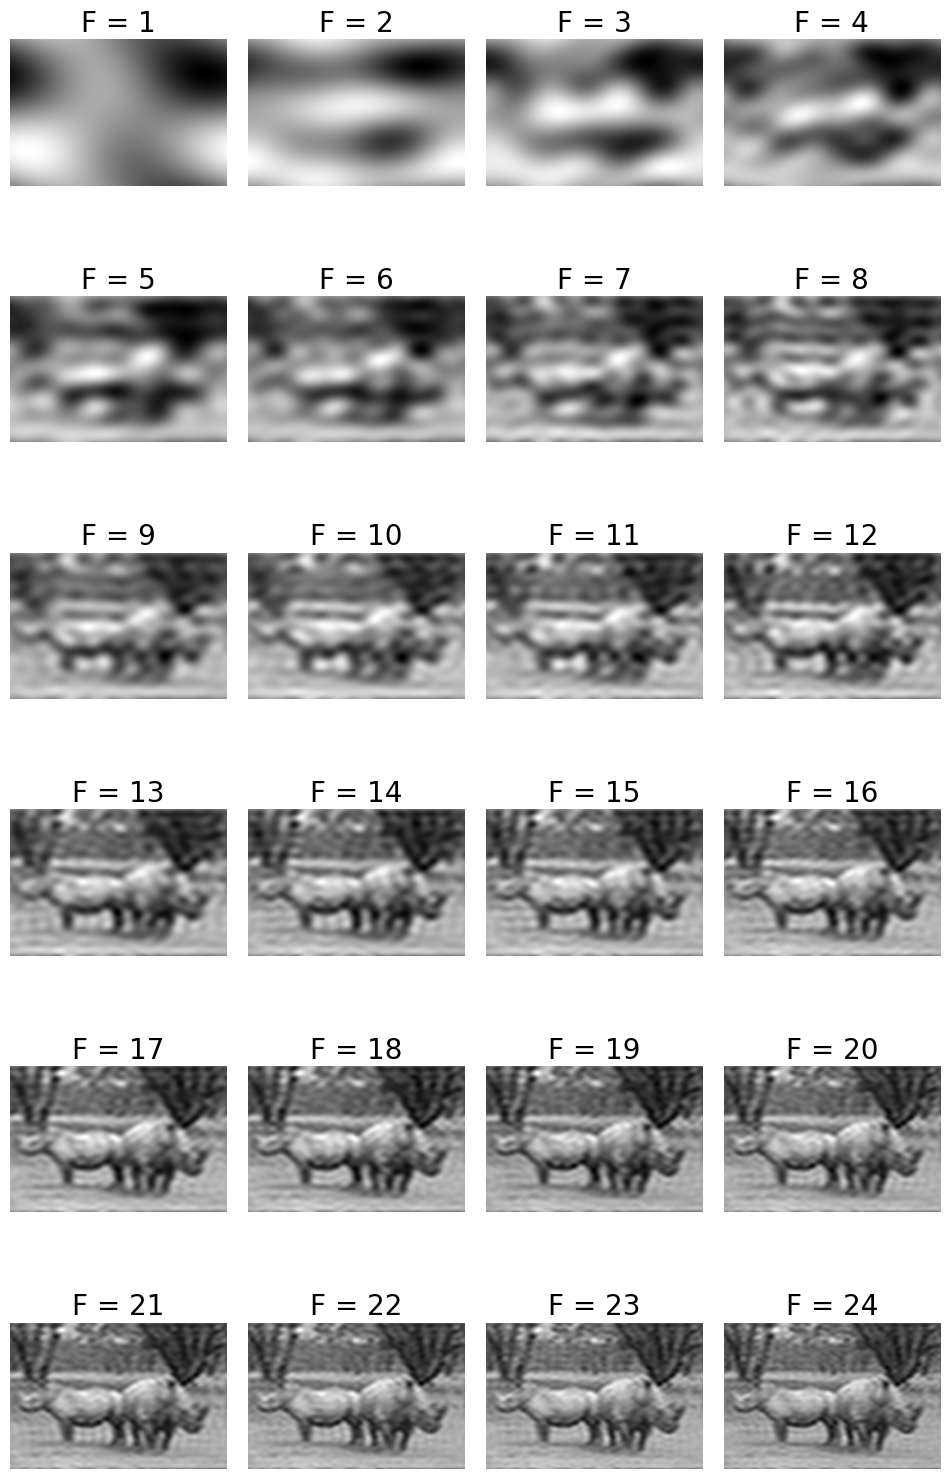

In [65]:
im = np.array(Image.open(r'images\rhino.jpg').convert('L'))


freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
snrs_lp = []
ubs = list(range(1,25))
pylab.figure(figsize=(12,20))
for u in ubs:
    freq1 = np.copy(freq)
    freq2 = fftpack.fftshift(freq1)
    freq2_low = np.copy(freq2)
    freq2_low[half_w-u:half_w+u+1,half_h-u:half_h+u+1] = 0
    freq2 -= freq2_low # select only the first 20x20 (low) frequencies
    im1 = fp.ifft2(fftpack.ifftshift(freq2)).real
    #snrs_lp.append(signaltonoise(im1, axis=None))
    pylab.subplot(6,4,u), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('F = ' + str(u), size=20)
pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()

### Band-pass filter (BPF) with DoG

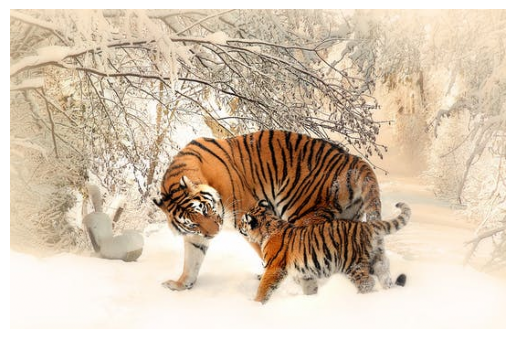

0.7832723415957195


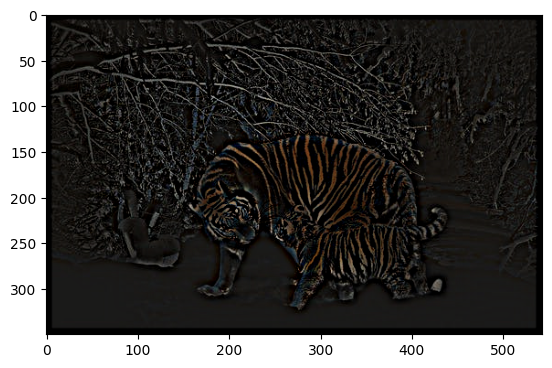

In [67]:
from skimage import img_as_float
im = img_as_float(pylab.imread('images/tigers.jpeg'))



pylab.figure(), pylab.imshow(im), pylab.axis('off'), pylab.show()
x = np.linspace(-10, 10, 15)
kernel_1d = np.exp(-0.005*x**2)
kernel_1d /= np.trapz(kernel_1d) # normalize the sum to 1
gauss_kernel1 = kernel_1d[:, np.newaxis] * kernel_1d[np.newaxis, :]
kernel_1d = np.exp(-5*x**2)
kernel_1d /= np.trapz(kernel_1d) # normalize the sum to 1
gauss_kernel2 = kernel_1d[:, np.newaxis] * kernel_1d[np.newaxis, :]
DoGKernel = gauss_kernel1[:, :, np.newaxis] - gauss_kernel2[:, :, np.newaxis]
im = signal.fftconvolve(im, DoGKernel, mode='same')
pylab.figure(), pylab.imshow(np.clip(im, 0, 1)), print(np.max(im)),
pylab.show()

### Band-stop (notch) filter

(340, 453)


C:\Users\hpary\AppData\Local\Temp\ipykernel_6880\677341394.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot(2,2,2), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
C:\Users\hpary\AppData\Local\Temp\ipykernel_6880\677341394.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot(2,2,4), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)


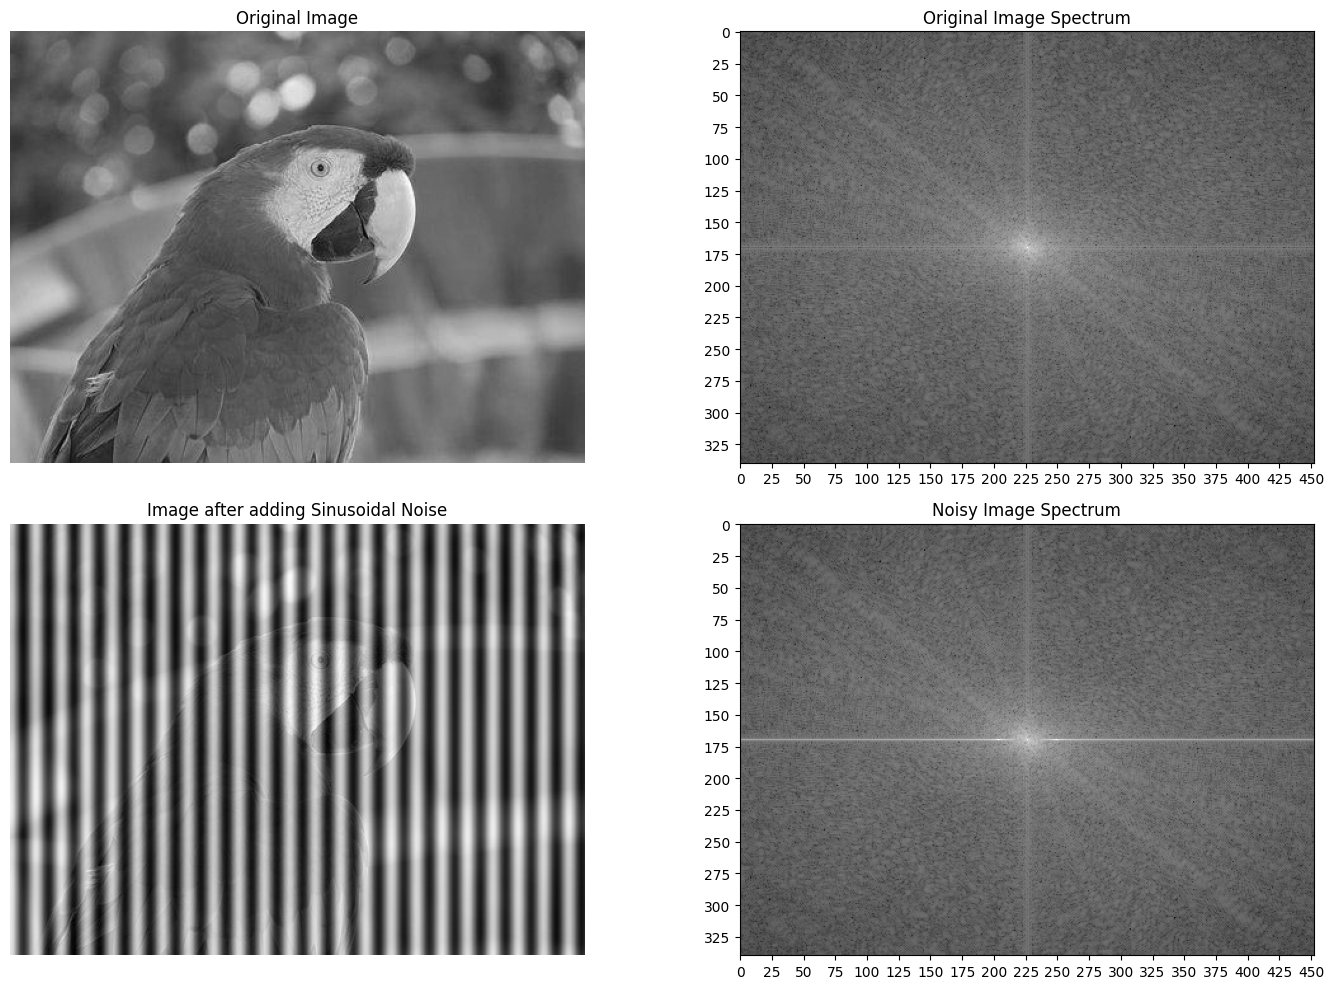

In [68]:
from scipy import fftpack
pylab.figure(figsize=(15,10))
im =  np.mean(imread("images/parrot.png"), axis=2) / 255
print(im.shape)


pylab.subplot(2,2,1), pylab.imshow(im, cmap='gray'), pylab.axis('off')
pylab.title('Original Image')


F1 = fftpack.fft2((im).astype(float))
F2 = fftpack.fftshift( F1 )


pylab.subplot(2,2,2), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
pylab.xticks(np.arange(0, im.shape[1], 25))
pylab.yticks(np.arange(0, im.shape[0], 25))
pylab.title('Original Image Spectrum')


# add periodic noise to the image
for n in range(im.shape[1]):
    im[:, n] += np.cos(0.1*np.pi*n)
pylab.subplot(2,2,3), pylab.imshow(im, cmap='gray'), pylab.axis('off')
pylab.title('Image after adding Sinusoidal Noise')
F1 = fftpack.fft2((im).astype(float)) # noisy spectrum
F2 = fftpack.fftshift( F1 )
pylab.subplot(2,2,4), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=pylab.cm.gray)
pylab.xticks(np.arange(0, im.shape[1], 25))
pylab.yticks(np.arange(0, im.shape[0], 25))
pylab.title('Noisy Image Spectrum')
pylab.tight_layout()
pylab.show()

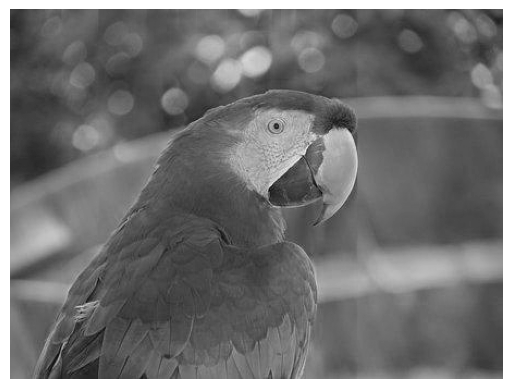

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x15e69bf3a50>, None)

In [69]:
F2[170:176,:220] = F2[170:176,230:] = 0 # eliminate the frequencies most likely responsible for noise (keep some low frequency components)
im1 = fftpack.ifft2(fftpack.ifftshift( F2 )).real
pylab.axis('off'), pylab.imshow(im1, cmap='gray'), pylab.show()